In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
# read sample data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))

In [23]:
# Examine world
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est,gdp_per_cap
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0,0.000784
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0,0.008618
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0,0.005993
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0,0.038408
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0,0.014027


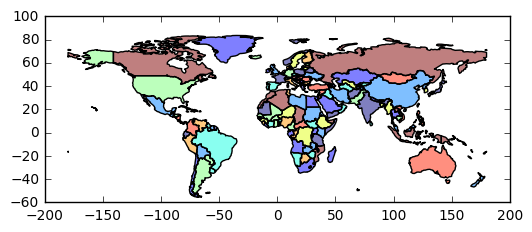

In [24]:
# basic plot
world.plot();

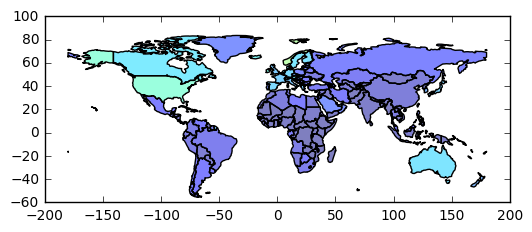

In [14]:
# chloropleth maps
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world["gdp_per_cap"] = world.gdp_md_est / world.pop_est
world.plot(column="gdp_per_cap");

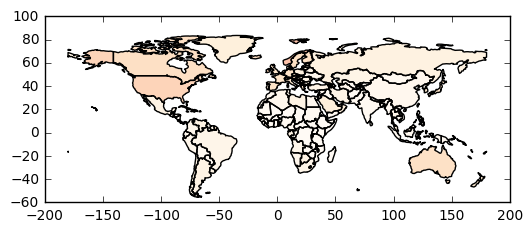

In [16]:
# choosing colors
world.plot(column="gdp_per_cap", cmap="OrRd");

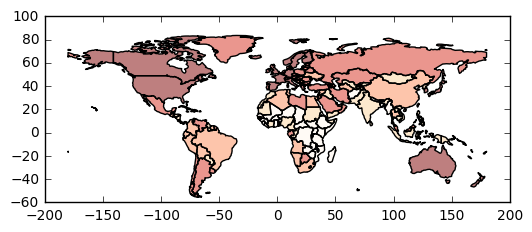

In [17]:
# manipulate scaling: need pysal installed
# see here for more scheme options
# http://pysal.readthedocs.io/en/latest/_modules/pysal/esda/mapclassify.html
world.plot(column="gdp_per_cap", cmap="OrRd", scheme="quantiles");

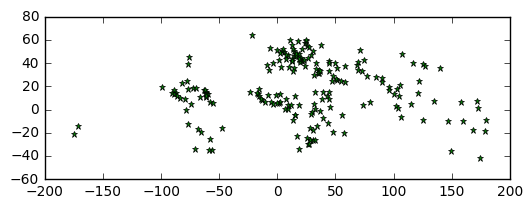

In [18]:
# map with layers
# Looking at capitals
cities.plot(marker="*", color="green", markersize=5)
cities = cities.to_crs(world.crs);

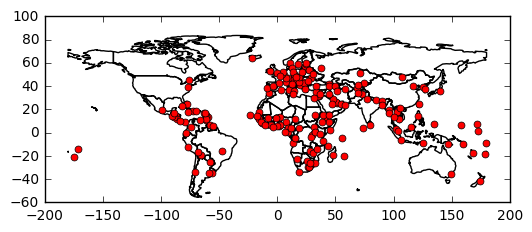

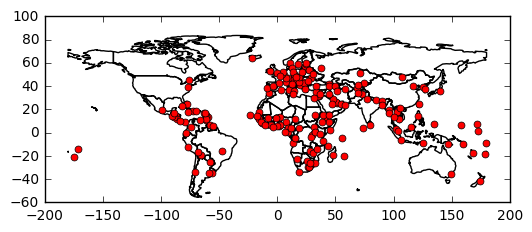

In [20]:
# method 1
base = world.plot(color="white")
cities.plot(ax=base, marker="o", color="red", markersize=5);

# method 2
fig, ax = plt.subplots()
ax.set_aspect("equal")
world.plot(ax=ax, color="white")
cities.plot(ax=ax, marker="o", color="red", markersize=5);